<a href="https://colab.research.google.com/github/pascale25/Deep_learning/blob/master/CNN_Visual_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [144]:
# library of computeur vision

In [145]:
import torchvision
import torch
from torch import nn
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


In [146]:
print(torch.__version__)
print(torchvision.__version__)

1.12.1+cu113
0.13.1+cu113


In [147]:
# getting the dataset
# Setup training data
train_data = datasets.FashionMNIST(
    root="data", # where to download data to?
    train=True, # get training data
    download=True, # download data if it doesn't exist on disk
    transform=ToTensor(), # images come as PIL format, we want to turn into Torch tensors
    target_transform=None # you can transform labels as well
)

# Setup testing data
test_data = datasets.FashionMNIST(
    root="data",
    train=False, # get test data
    download=True,
    transform=ToTensor()
)


In [148]:
len(train_data), len(test_data)

(60000, 10000)

In [149]:
# See first training sample
image, label = train_data[0]
image, label


(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [150]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [151]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

# input ans output shape

In [152]:
image.shape, label # has only color channel [c,H,W]

(torch.Size([1, 28, 28]), 9)

In [153]:
print(f"image shape: {image.shape}' -> [color_channels, height, witth]")
print(f"Image label: {class_names[label]}")

image shape: torch.Size([1, 28, 28])' -> [color_channels, height, witth]
Image label: Ankle boot


##  visualize the data 

torch.Size([1, 28, 28])


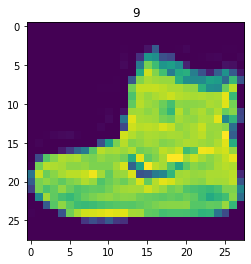

In [154]:
image, label = train_data[0]
print(image.shape)
plt.imshow(image.squeeze())
plt.title(label)
plt.show()

torch.Size([1, 28, 28])


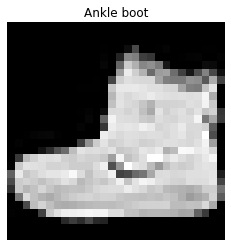

In [155]:
image, label = train_data[0]
print(image.shape)
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)
plt.show()

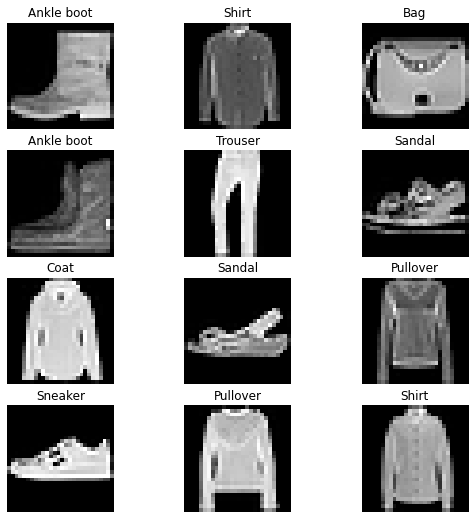

In [156]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 3
for i in range (1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap='gray')
  plt.title(class_names[label])
  plt.axis(False)



In [157]:
# prepare dataloader 

In [158]:
train_data , test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(), Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [159]:
# Prepare DataLoader
from torch.utils.data import DataLoader
BATH_SIZE = 32
train_dataloader = DataLoader(dataset=train_data, 
                                batch_size= BATH_SIZE,
                                shuffle = True)
test_dataloader = DataLoader(dataset = test_data,
                               batch_size = BATH_SIZE,
                               shuffle = False)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7ff09879c5d0>,
 <torch.utils.data.dataloader.DataLoader at 0x7ff09879c590>)

In [160]:
print(len(train_dataloader), BATH_SIZE)
print(len(test_dataloader), BATH_SIZE)

1875 32
313 32


In [161]:
train_features_bath, train_labels_bath = next(iter(train_dataloader))
train_features_bath.shape, train_labels_bath.shape # bath_size, channel, height, width, 32 labels associated

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

torch.Size([1, 28, 28])
tensor(1) torch.Size([])


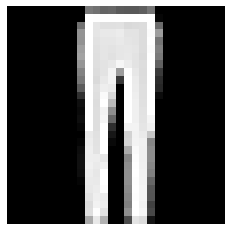

In [162]:
#torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_bath), size=[1]).item()
img, label = train_features_bath[random_idx], train_labels_bath[random_idx]
plt.imshow(img.squeeze(), cmap ='gray')
plt.axis(False)
print(img.shape)
print(label, label.shape)



In [163]:
from matplotlib.cbook import flatten
# best to stard with a base line model , a simple mmodel/ model experiemnt

flatten_model = nn.Flatten()
# get one sample of the training
x = train_features_bath[0]
x.shape

torch.Size([1, 28, 28])

In [164]:
output = flatten_model(x)
print(x.shape)
print(output.shape)
# Print out what happened
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")

torch.Size([1, 28, 28])
torch.Size([1, 784])
Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


# model_01 Linear model 

In [165]:
from torch.nn.modules.linear import Linear
from torch import nn
class FashionMNISTVModelV0(nn.Module):
  def __init__(self, input_shape: int, hidden_units:int, output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features= input_shape, out_features= hidden_units),
        nn.Linear(in_features= hidden_units, out_features = output_shape))
    
  def forward(self, x):
    return self.layer_stack(x)

In [166]:
model_01 = FashionMNISTVModelV0(input_shape=28*28, # 784
                         hidden_units= 10,
                         output_shape = len(class_names)).to('cpu') # one for every class # keep model on CPU to begin with
model_01

FashionMNISTVModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [167]:
len(class_names)

10

In [168]:
dummy_x = torch.rand([1,1,28,28])
model_01(dummy_x)
  

tensor([[-0.1346, -0.1822,  0.4106,  0.0670, -0.5223, -0.3235,  0.1189, -0.2083,
          0.2132, -0.1851]], grad_fn=<AddmmBackward0>)

In [169]:
model_01.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0053, -0.0167,  0.0091,  ..., -0.0241,  0.0349, -0.0072],
                      [ 0.0142, -0.0319,  0.0206,  ..., -0.0304,  0.0081,  0.0005],
                      [ 0.0217,  0.0023,  0.0029,  ...,  0.0071,  0.0319, -0.0184],
                      ...,
                      [-0.0126, -0.0093,  0.0024,  ...,  0.0224, -0.0069,  0.0233],
                      [-0.0008, -0.0126, -0.0139,  ..., -0.0216,  0.0082,  0.0110],
                      [ 0.0066,  0.0330,  0.0033,  ...,  0.0238,  0.0122, -0.0257]])),
             ('layer_stack.1.bias',
              tensor([-0.0120,  0.0228,  0.0321, -0.0169,  0.0152, -0.0084,  0.0227, -0.0054,
                      -0.0284, -0.0354])),
             ('layer_stack.2.weight',
              tensor([[-0.0118,  0.0932, -0.1864,  0.2488,  0.1500,  0.1907,  0.1457, -0.3050,
                       -0.0580,  0.1643],
                      [ 0.1565, -0.2877, -0.1792,  0.2305, -0.2618,  0.2397, -0.

In [170]:
#  helper function of pytorch 
import requests
from pathlib import Path

if Path ("helper_function").is_file():
  print("helper_function.py already exists, skipping dowlaord ...")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/pascale25/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [171]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_01.parameters(), lr = 0.1 )

In [172]:
#create a function to time oiur experiemnt
from timeit import default_timer as timer

def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format). 
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

Let's step through it:

Loop through epochs.

Loop through training batches, perform training steps, calculate the train loss per batch.

Loop through testing batches, perform testing steps, calculate the test loss per batch.

Print out what's happening.

Time it all (for fun).

##  Creating a training loop and training a model_01 on batches of data

In [173]:
# Setup device agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [174]:
from torch.nn.modules import loss
from tqdm.auto import tqdm 

torch.manual_seed(42) # set the seed
# start the training timer 
train_time_start_on_cpu = timer()

epochs = 3
# train and test loop
for epoch in tqdm(range(epochs)):
  print(f'Epch: {epoch}\n----')
  ### training
  train_loss = 0
  ## loop on training data
  for batch, (X,y) in enumerate(train_dataloader):
    model_01.train()
    # forward pass
    y_pred = model_01(X)
    # calculate the loss
    loss = loss_fn(y_pred, y)
    train_loss +=loss # accumulate train loss
    # optimizer
    optimizer.zero_grad()
    # loss backward
    loss.backward()
    # optimizer next step
    optimizer.step()
    if batch % 400 == 0:
      print(f"Looked at{batch *len(X)}/{len(train_dataloader.dataset)} sample")

    # Divide total train loss by length of train dataloader (average loss per batch per epoch)
  train_loss /= len(train_dataloader)

  # testing loop
  test_loss, test_acc = 0, 0
  model_01.eval()
  with torch.inference_mode():
    for X, y in test_dataloader:
      # forward pass
      test_pred = model_01(X)
      # calculate the loss 
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true = y, y_pred=test_pred.argmax(dim=1))
      # test loss average per bacth 
    test_loss /=len(test_dataloader)
    test_acc /= len(test_dataloader)

  # print loss
  print (f"\ntrain loss: {train_loss:.4f} | Test less: {test_loss:.4}, Test acc: {test_acc:.4f}")



# training time end
train_time_end_on_cpu = timer()
# eval training time (stat and end)
total_train_tine_model_01 = print_train_time(start=train_time_start_on_cpu, 
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_01.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epch: 0
----
Looked at0/60000 sample
Looked at12800/60000 sample
Looked at25600/60000 sample
Looked at38400/60000 sample
Looked at51200/60000 sample

train loss: 0.5903 | Test less: 0.5041, Test acc: 82.3383
Epch: 1
----
Looked at0/60000 sample
Looked at12800/60000 sample
Looked at25600/60000 sample
Looked at38400/60000 sample
Looked at51200/60000 sample

train loss: 0.4769 | Test less: 0.4857, Test acc: 82.8375
Epch: 2
----
Looked at0/60000 sample
Looked at12800/60000 sample
Looked at25600/60000 sample
Looked at38400/60000 sample
Looked at51200/60000 sample

train loss: 0.4551 | Test less: 0.4791, Test acc: 83.4764
Train time on cpu: 21.114 seconds


In [175]:
# Setup device agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

###  Make predictions and get Model_01   0 results


In [176]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  
  """  Returns a dictionary containing the results of model predicting on data_loader.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.

    Returns:
        (dict): Results of model making predictions on data_loader.   
  """
  loss, acc = 0, 0 
  model.eval()

  with torch.inference_mode():
    for X,y in data_loader:
      # make predictions
      y_pred = model(X)
      # Accumulate the Loass and Acc values par batch
      loss+= loss_fn(y_pred, y)
      acc += accuracy_fn( y_true= y , y_pred= y_pred.argmax(dim=1))

    # scale loss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /=len(data_loader)

  return {"model_name": model.__class__.__name__, # only works when model was created with a class
          "model_loss": loss.item(),
          "model_acc":acc}




# calculate model 01 result  on test dataset

model_01_results = eval_model(model=model_01,
                              data_loader = test_dataloader,
                              loss_fn = loss_fn,
                              accuracy_fn=accuracy_fn)


model_01_results

{'model_name': 'FashionMNISTVModelV0',
 'model_loss': 0.47908854484558105,
 'model_acc': 83.47643769968052}

In [177]:
!nvidia-smi

Sun Oct  9 02:43:25 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P0    27W /  70W |   1160MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [178]:
torch.cuda.is_available()

True

In [179]:
import torch
device ='cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

# Model 2 with non linearity 

In [180]:
from torch.nn.modules.linear import Linear
from torch import nn
class FashionMNISTVModelV2(nn.Module):
  def __init__(self, input_shape: int, hidden_units:int, output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(), # flatten input in a single vector
        nn.Linear(in_features= input_shape, 
                  out_features= hidden_units),
        nn.ReLU(),
        nn.Linear(in_features= hidden_units, 
                  out_features = output_shape),
        nn.ReLU()
    )
    

  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)

In [181]:
next(model_01.parameters()).device

device(type='cpu')

In [182]:
torch.manual_seed(42)
model_2 = FashionMNISTVModelV2(input_shape = 784,
                               hidden_units = 10,
                               output_shape =len(class_names)).to(device)


In [183]:
next(model_2.parameters()).device

device(type='cuda', index=0)

In [184]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)

# Build a Function for training and evaluation 

In [185]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  """ perform a training with model trying to learn on data loader"""
  train_loss, train_acc = 0, 0 
  # model train

  model.train()

  for batch, (X,y) in enumerate(data_loader):
    # data in target device
    X ,y = X.to(device), y.to(device)
    
    # forward pass (outputs the raw logits from model)
    y_pred = model(X)

    # calculate the loss and accuracy (per batch)
    loss = loss_fn(y_pred, y)
    train_loss +=loss # accumulate train loss
    train_acc += accuracy_fn(y_true=y, 
                             y_pred = y_pred.argmax(dim=1)) # go from logits to prediction lable


    # optimizer zero grad 
    optimizer.zero_grad()

    # loss backward
    loss.backward()

    # optimizer next step
    optimizer.step()


      # Divide total train loss and accuracy  by length of train dataloader (average loss per batch per epoch)
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")



In [186]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
  """ performs a testing loop step on model going over data_loader """
  test_loss, test_acc = 0, 0

  #put the model in eval mode

  model.eval()

  # trun on inference mode context manager
  with torch.inference_mode():
    for X, y in data_loader:
      # send data to target device
      X, y = X.to(device), y.to(device)

      # 1. forward pass
      test_pred = model(X)

      # 2. calcuate the loss and accuracy
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true=y, 
                              y_pred= test_pred.argmax(dim=1))

    # adjust metric and print 
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")



In [187]:
torch.manual_seed(42)

# measure time
from timeit import default_timer as timer

train_time_start_on_gpu = timer()

# set epochs
epoche = 3

# creat a optimization and evaluation loop using train step and test step

for epoch in tqdm(range(epochs)):
  print(f"epoch: {epoch}\n------------")
  
  train_step(data_loader = train_dataloader,
             model= model_2,
             loss_fn = loss_fn,
             optimizer = optimizer,
             accuracy_fn = accuracy_fn
  )
  
  test_step(data_loader = test_dataloader,
            model=model_2,
            loss_fn = loss_fn,
            accuracy_fn = accuracy_fn
  )

train_time_end_on_gpu = timer()

total_train_time_model_2 = print_train_time(start = train_time_start_on_gpu,
                                            end = train_time_end_on_gpu,
                                            device = device)

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 0
------------
Test loss: 0.47909 | Test accuracy: 83.48%

Test loss: 0.95636 | Test accuracy: 65.00%

epoch: 1
------------
Test loss: 0.47909 | Test accuracy: 83.48%

Test loss: 0.72227 | Test accuracy: 73.91%

epoch: 2
------------
Test loss: 0.47909 | Test accuracy: 83.48%

Test loss: 0.68500 | Test accuracy: 75.02%

Train time on cuda: 23.781 seconds


# code from note Book

In [188]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode(): 
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)
            
            # 1. Forward pass
            test_pred = model(X)
            
            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )
        
        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [189]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader, 
        model=model_2, 
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn
    )
    test_step(data_loader=test_dataloader,
        model=model_2,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn
    )

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.64519 | Train accuracy: 76.65%
Test loss: 0.68914 | Test accuracy: 75.03%

Epoch: 1
---------
Train loss: 0.62752 | Train accuracy: 77.09%
Test loss: 0.66747 | Test accuracy: 75.82%

Epoch: 2
---------
Train loss: 0.61555 | Train accuracy: 77.36%
Test loss: 0.64590 | Test accuracy: 76.36%

Train time on cuda: 22.031 seconds


### Evaluation Model function move to device

In [190]:
# Move values to device
torch.manual_seed(42)
def eval_model(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               accuracy_fn, 
               device: torch.device = device):
    """Evaluates a given model on a given dataset.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.
        device (str, optional): Target device to compute on. Defaults to device.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to the target device
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
        
        # Scale loss and acc
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 1 results with device-agnostic code 
model_2_results = eval_model(model=model_2, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn,
    device=device
)
model_2_results

{'model_name': 'FashionMNISTVModelV2',
 'model_loss': 0.645904004573822,
 'model_acc': 76.35782747603834}

In [191]:
# get Mmodel_2 in dictionnalry
model_2_results = eval_model(model=model_2,
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn = accuracy_fn)
model_2_results

{'model_name': 'FashionMNISTVModelV2',
 'model_loss': 0.645904004573822,
 'model_acc': 76.35782747603834}

In [192]:
model_01_results

{'model_name': 'FashionMNISTVModelV0',
 'model_loss': 0.47908854484558105,
 'model_acc': 83.47643769968052}

# Model CNN  Model 3

In [193]:
from torch.nn.modules.conv import Conv2d
# Create a convolutional neural network 
class FashionMNISTModelV2(nn.Module):
    """
    Model architecture copying TinyVGG from: 
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int,
                 hidden_units: int,
                 output_shape: int):
      super().__init__()
      self.conv_block_1 = nn.Sequential(
          nn.Conv2d(in_channels= input_shape,
                    out_channels = hidden_units,
                    kernel_size = 3,
                    stride = 1,
                    padding = 1), # hyerparams
          nn.ReLU(),
          nn.Conv2d(in_channels = hidden_units,
                    out_channels = hidden_units,
                    kernel_size = 3,
                    stride = 1,
                    padding = 1),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size = 2,
                       stride = 2)
      )

      self.conv_block_2 = nn.Sequential(
          nn.Conv2d(hidden_units, hidden_units, 3, stride = 1, padding=1),
          nn.ReLU(),
          nn.Conv2d(hidden_units, hidden_units, 3, stride = 1, padding=1),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size=2)
      )
      self.classifier = nn.Sequential(
          nn.Flatten(),
          nn.Linear(in_features = hidden_units*7*7,
                    out_features= output_shape)
      )

    def forward(self, x: torch.tensor):
      x = self.conv_block_1(x)
      #print(x.shape)
      x = self.conv_block_2(x)
      #print(x.shape)
      x = self.classifier(x)
      return x

In [194]:
torch.manual_seed(42)
model_3 = FashionMNISTModelV2(input_shape=1, 
    hidden_units=10, 
    output_shape=len(class_names)).to(device)
model_3

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [195]:
# Create a convolutional neural network 
class FashionMNISTModelV22(nn.Module):
    """
    Model architecture copying TinyVGG from: 
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1),# options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number 
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from? 
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=hidden_units*7*7, 
                      out_features=output_shape)
        )
    
    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        # print(x.shape)
        x = self.block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

torch.manual_seed(42)
model_4 = FashionMNISTModelV22(input_shape=1, 
    hidden_units=10, 
    output_shape=len(class_names)).to(device)
model_4

FashionMNISTModelV22(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

# *******************************************************************************

In [196]:
torch.manual_seed(42)

# Create sample batch of random numbers with same size as image batch
images = torch.randn(size=(32, 3, 64, 64)) # [batch_size, color_channels, height, width]
test_image = images[0] # get a single image for testing
print(f"Image batch shape: {images.shape} -> [batch_size, color_channels, height, width]")
print(f"Single image shape: {test_image.shape} -> [color_channels, height, width]") 
print(f"Single image pixel values:\n{test_image}")

Image batch shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Single image shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Single image pixel values:
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,

In [197]:
torch.manual_seed(42)

# Create a convolutional layer with same dimensions as TinyVGG 
# (try changing any of the parameters and see what happens)
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0) # also try using "valid" or "same" here 

# Pass the data through the convolutional layer
conv_layer(test_image) # Note: If running PyTorch <1.11.0, this will error because of shape issues (nn.Conv.2d() expects a 4d tensor as input) 

tensor([[[ 1.5396,  0.0516,  0.6454,  ..., -0.3673,  0.8711,  0.4256],
         [ 0.3662,  1.0114, -0.5997,  ...,  0.8983,  0.2809, -0.2741],
         [ 1.2664, -1.4054,  0.3727,  ..., -0.3409,  1.2191, -0.0463],
         ...,
         [-0.1541,  0.5132, -0.3624,  ..., -0.2360, -0.4609, -0.0035],
         [ 0.2981, -0.2432,  1.5012,  ..., -0.6289, -0.7283, -0.5767],
         [-0.0386, -0.0781, -0.0388,  ...,  0.2842,  0.4228, -0.1802]],

        [[-0.2840, -0.0319, -0.4455,  ..., -0.7956,  1.5599, -1.2449],
         [ 0.2753, -0.1262, -0.6541,  ..., -0.2211,  0.1999, -0.8856],
         [-0.5404, -1.5489,  0.0249,  ..., -0.5932, -1.0913, -0.3849],
         ...,
         [ 0.3870, -0.4064, -0.8236,  ...,  0.1734, -0.4330, -0.4951],
         [-0.1984, -0.6386,  1.0263,  ..., -0.9401, -0.0585, -0.7833],
         [-0.6306, -0.2052, -0.3694,  ..., -1.3248,  0.2456, -0.7134]],

        [[ 0.4414,  0.5100,  0.4846,  ..., -0.8484,  0.2638,  1.1258],
         [ 0.8117,  0.3191, -0.0157,  ...,  1

In [198]:
# Add extra dimension to test image
test_image.unsqueeze(dim=0).shape

torch.Size([1, 3, 64, 64])

In [199]:
# Pass test image with extra dimension through conv_layer
conv_layer(test_image.unsqueeze(dim=0)).shape

torch.Size([1, 10, 62, 62])

# *******************

# Optimizer and loss for model 3 --- train and testin model with the training and testing function


In [200]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(), lr=0.1)

In [201]:
# model_3.state_dict()

In [202]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#measure the time 
from timeit import default_timer as timer
train_time_start_model_3 = timer()

 # train and test model
epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch} \n--------")

  train_step(model = model_3,
             data_loader= train_dataloader,
             loss_fn = loss_fn,
             optimizer = optimizer,
             accuracy_fn = accuracy_fn,
             device = device)
  test_step(model = model_3,
            data_loader = test_dataloader,
            loss_fn = loss_fn,
            accuracy_fn = accuracy_fn,
            device = device)
  
train_time_end_model_3 = timer()
total_train_time_model_3 = print_train_time(start =train_time_start_model_3,
                                              end = train_time_end_model_3,
                                              device = device)
  


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 
--------
Train loss: 0.59396 | Train accuracy: 78.44%
Test loss: 0.39048 | Test accuracy: 86.01%

Epoch: 1 
--------
Train loss: 0.36437 | Train accuracy: 86.85%
Test loss: 0.35301 | Test accuracy: 86.94%

Epoch: 2 
--------
Train loss: 0.32516 | Train accuracy: 88.23%
Test loss: 0.32399 | Test accuracy: 88.09%

Train time on cuda: 29.919 seconds


In [203]:
# get model_3 result in dictionary
model_3_results = eval_model(
    model=model_3,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn = accuracy_fn,
    device = device
)
model_3_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32398584485054016,
 'model_acc': 88.08905750798722}

# compare all models (01, 2, 3)

In [204]:
import pandas as pd

compare_results = pd.DataFrame([model_01_results,
                                model_2_results,
                                model_3_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTVModelV0,0.479089,83.476438
1,FashionMNISTVModelV2,0.645904,76.357827
2,FashionMNISTModelV2,0.323986,88.089058


In [205]:
# adding training time to results comparison
compare_results["training_time"] = [total_train_time_model_1, total_train_time_model_2, total_train_time_model_3]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTVModelV0,0.479089,83.476438,22.031148
1,FashionMNISTVModelV2,0.645904,76.357827,23.780632
2,FashionMNISTModelV2,0.323986,88.089058,29.919257


In [206]:
# comment
# training time because og f the use of GPU in the model 2 and 3. because the loop have to put the data and model into device

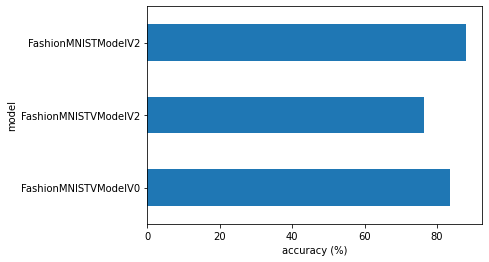

In [207]:
# # Visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model");

# Make prediction with the best model on a random sample


In [208]:
#test_data[0][:1] # no turne in dataloader
img, label = test_data[0][:3]
img.shape, label

(torch.Size([1, 28, 28]), 9)

In [209]:
# Add extra dimension to  image
img.unsqueeze(dim=0).shape

torch.Size([1, 1, 28, 28])

In [210]:
img.squeeze().shape

torch.Size([28, 28])

(-0.5, 27.5, 27.5, -0.5)

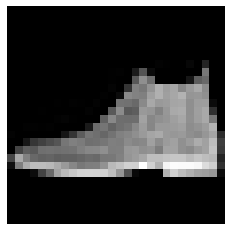

In [211]:
plt.imshow(img.squeeze(), cmap ='gray')
plt.axis(False)

In [212]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
    pred_probs = []
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare sample (add a batch dimension and pass to target device)
            sample = torch.unsqueeze(sample, dim=0).to(device) # Add an extra dimension and send sample to device

            # Forward pass (model outputs raw logit)
            pred_logit = model(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

            # Get pred_prob off GPU for further calculations
            pred_probs.append(pred_prob.cpu()) # matplotlib do not work on GPU
            
    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [213]:
# get random data from test_data (no test_dataloader)
import random
#random.seed(42)
test_samples = []
test_labels = []
# get some random sample from the test data set
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first test sample shape and label
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 0 (T-shirt/top)


Text(0.5, 1.0, 'T-shirt/top')

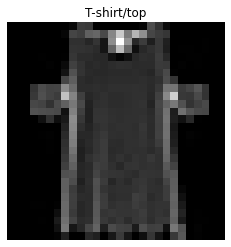

In [214]:
plt.imshow(test_samples[0].squeeze(), cmap ='gray')
plt.axis(False)
plt.title(class_names[test_labels[0]])

In [215]:
# Make Predictions 
pred_probs= make_predictions(model=model_3, 
                             data=test_samples)

# View first two prediction probabilities list
pred_probs[:2]

tensor([[3.6644e-01, 3.4527e-05, 3.1265e-04, 1.3232e-02, 5.9375e-04, 9.1648e-07,
         6.1914e-01, 2.4000e-06, 2.4543e-04, 5.5621e-07],
        [3.5135e-04, 1.3373e-06, 7.0292e-01, 1.7397e-04, 2.9521e-01, 3.1613e-08,
         1.3333e-03, 3.3759e-07, 8.1830e-06, 3.9077e-07]])

In [216]:
# Turn the prediction probabilities into prediction labels by taking the argmax()
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([6, 2, 7, 8, 5, 8, 9, 8, 5])

In [217]:
# Are our predictions in the same form as our test labels? 
test_labels, pred_classes

([0, 2, 7, 8, 5, 8, 9, 8, 5], tensor([6, 2, 7, 8, 5, 8, 9, 8, 5]))

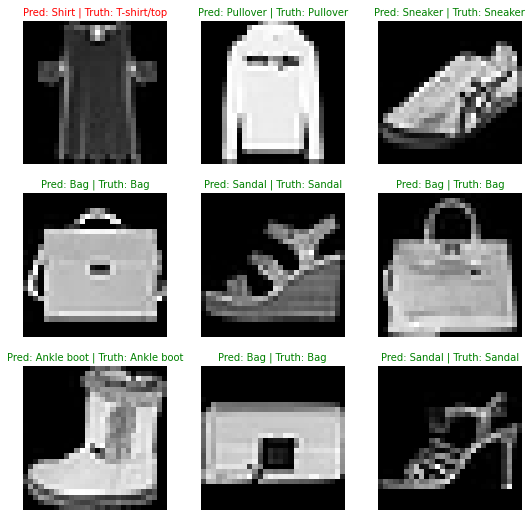

In [218]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create a subplot and index (i+1)
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image, squeeze to remove the bath dimension 
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction label (in text form, e.g. "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form, e.g. "T-shirt")
  truth_label = class_names[test_labels[i]] 

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"
  
  # Check for equality and change title colour accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);

###  Making a confusion matrix for further prediction evaluation (entire dataset)

In [219]:
# use the entire dataset
# Import tqdm for progress bar
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model_3.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    # Send data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model_2(X)
    # Turn predictions from logits -> prediction probabilities -> predictions labels
    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
    # Put predictions on CPU for evaluation
    y_preds.append(y_pred.cpu()) # Matplotlib want them on cpu
# Concatenate list of predictions into a single  tensor
#print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([3, 2, 1, 1, 3, 1, 4, 6, 3, 3])

####  If using Google Colab, the default version of mlxtend installed is 0.14.0 (as of March 2022), however, for the parameters of the plot_confusion_matrix() function we'd like use, we need 0.19.0 or higher.

In [220]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    

mlxtend version: 0.21.0


In [221]:
# Import mlxtend upgraded version
import mlxtend 
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19 # should be version 0.19.0 or higher

0.21.0


####### To plot the confusion matrix, we need to make sure we've got and mlxtend version of 0.19.0 or higher.

In [224]:
print(class_names)
print(test_data.targets)
print(test_data.classes)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
tensor([9, 2, 1,  ..., 8, 1, 5])
['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


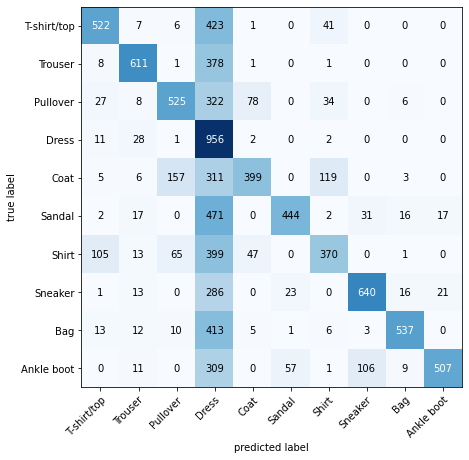

In [222]:
# Finally we can plot our confision matrix using the plot_confusion_matrix() function from mlxtend.plotting.
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names))
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy 
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10, 7)
);



### Save and load best performing model

In [226]:
from pathlib import Path

# Create models directory (if it doesn't already exist), see: https://docs.python.org/3/library/pathlib.html#pathlib.Path.mkdir
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, # create parent directories if needed
                 exist_ok=True # if models directory already exists, don't error
)

# Create model save path
MODEL_NAME = "03_pytorch_computer_vision_model_3.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_3.state_dict(), # only saving the state_dict() only saves the learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/03_pytorch_computer_vision_model_3.pth


In [228]:
model_3.state_dict

<bound method Module.state_dict of FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)>

In [229]:
# Create a new instance of FashionMNISTModelV2 (the same class as our saved state_dict())
# Note: loading model will error if the shapes here aren't the same as the saved version
loaded_model_3 = FashionMNISTModelV2(input_shape=1, 
                                    hidden_units=10, # try changing this to 128 and seeing what happens 
                                    output_shape=10) # or len(lass_names)

# Load in the saved state_dict()
loaded_model_3.load_state_dict(torch.load(f=MODEL_SAVE_PATH)) # f file path were the model was save

# Send model to GPU
loaded_model_3 = loaded_model_3.to(device) # send model to target device

In [231]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_3_results = eval_model(
    model=loaded_model_3,
    data_loader=test_dataloader,
    loss_fn=loss_fn, 
    accuracy_fn=accuracy_fn
)

loaded_model_3_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32398584485054016,
 'model_acc': 88.08905750798722}

In [232]:
# Check to see if results are close to each other (if they are very far away, there may be an error)
torch.isclose(torch.tensor(model_3_results["model_loss"]), 
              torch.tensor(loaded_model_3_results["model_loss"]),
              atol=1e-08, # absolute tolerance
              rtol=0.0001) # relative tolerance

tensor(True)